## MMC - L2 - Kacper Marchlewicz - 310195

# Zadanie 2

Została stworzona następująca funkcja do obliczania wartości testu chi-kwadrat, oraz generowania liczb do plików dla generatora 'złego' i 'dobrego'.

In [ ]:
#include <iostream>
#include <random>
#include <fstream>  
#include <vector>
#include <algorithm>
#include <numeric>  
#include <cmath>

double chi2(int k, std::vector<double> numbers){
    int n = numbers.size();
    // podział na k zbiorów
    double first = *std::min_element(numbers.begin(), numbers.end());
    double last = *std::max_element(numbers.begin(), numbers.end());
    double divider = (last-first) / (double)k;
    std::vector<int> divided_numbers_count(k,0);
    double curr_divider=first;
    double prev_divider;
    for(int i=0; i<k; i++){
        prev_divider = curr_divider;
        curr_divider += divider;
        for (int j=0; j< n; j++){
            if (((numbers[j] < curr_divider)&&(numbers[j] >= prev_divider))||
                ((i==k-1)&&((numbers[j] <= curr_divider)&&(numbers[j] >= prev_divider)))){
                divided_numbers_count[i]++;
            }
        } 
    }
    // obliczenie wzoru
    double value=0;
    for (int i = 0; i < k; i++){
        value += pow(divided_numbers_count[i], 2);
    }
    value = (((double)k/(double)n) *(value)) -(double)n;
    return value;
}

void evaluate(int k, std::vector<double> numbers){
    double value = chi2(k, numbers);
    std::cout << "test value = "<<value<<std::endl;     
    std::cout << "-----------------"<<std::endl;
}

void generate_values(int count){
    //rozkład jednostajnego na przedziale (0,10)
    std::uniform_real_distribution<double> rozklad(0, 10);
    std::ofstream outfile1("zad2_good_numbers.txt");
    std::ofstream outfile2("zad2_bad_numbers.txt");
    // minstd_rand knuth_b ranlux48 ranlux48_base mt19937_64 mt19937    
    // random_device
    std::random_device seed;
    //DOBRY
    std::ranlux48 generator1(seed());
    for (int i=0; i<count; i++){
        double number = rozklad(generator1);
        outfile1 << number << std::endl;
    }
    outfile1.close();
    //ZLY
    std::minstd_rand generator2(seed());
    for (int i=0; i<count; i++){
        double number = rozklad(generator2);
        outfile2 << number << std::endl;
    }
    outfile2.close();
}

Wywołanie i przerowadzenie odpowiednich badań wygląda następująco:

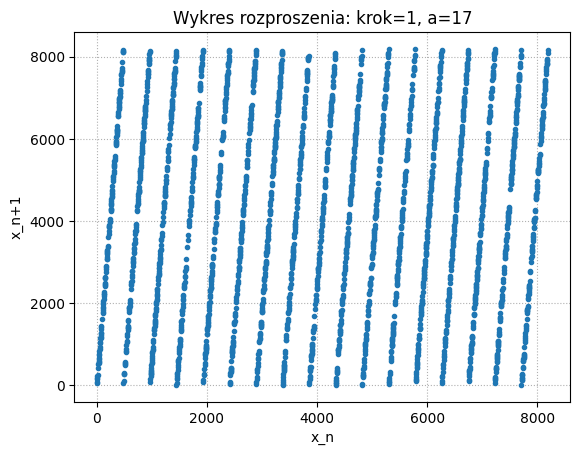

In [ ]:
int main(){
    // wygenerowanie danych i plików
    generate_values(100000);
    // wczytanie danych z plików
    std::fstream file1("zad2_good_numbers.txt");
    std::vector<double> dobry_gen;
    double c1;
    while (file1 >> c1) {
        dobry_gen.push_back(c1);
    }
    file1.close();
    std::fstream file2("zad2_bad_numbers.txt");
    std::vector<double> zly_gen;
    double c2;
    while (file2 >> c2) {
        zly_gen.push_back(c2);
    }
    file2.close();
    // obliczenia
    int p=11;
    std::cout << "Przedziały= "<<p<<std::endl;
    std::cout << "ranlux48"<<std::endl;
    evaluate(p, dobry_gen);
    std::cout << "minstd_rand"<<std::endl;
    evaluate(p, zly_gen);
    p=51;
    std::cout << "Przedziały= "<<p<<std::endl;
    std::cout << "ranlux48"<<std::endl;
    evaluate(p, dobry_gen);
    std::cout << "minstd_rand"<<std::endl;
    evaluate(p, zly_gen);
    p=101;
    std::cout << "Przedziały= "<<p<<std::endl;
    std::cout << "ranlux48"<<std::endl;
    evaluate(p, dobry_gen);
    std::cout << "minstd_rand"<<std::endl;
    evaluate(p, zly_gen);
    return 0;
}

Otrzymane wyniki porównane z wartościami rozkładu x^2_{k-1} przedstawiono w poniższej tabeli:

| Generator | Liczba Przedziałów | Wartość Testu | Prawdopodobieństwo | Czy przeszedł test |
| --- | --- | --- | --- |
| ranlux48 | 11 | 2.63779 | 0.9887 | tak |
| minstd_rand | 11 | 8.9806 | 0.0405 | nie |
| ranlux48 | 51 | 43.0749 | 0.7453 | tak |
| minstd_rand | 51 | 51.9142 | 0.3991 | tak |
| ranlux48 | 101 | 83.0432 | 0.8900 | tak |
| minstd_rand | 101 | 111.445 | 0.2041 | tak |


Po wynikach widać słabą jakośc genratora 'minstd_rand'. Dla małej liczby przedziałów nie udało mu się przejśc testu, ale dla dużej liczby porzedziałów już tak, lecz z bardzo małą watością prawdopodobieństwa w porówaniu z 'dobrym' generatorem ranlux48.

# Zadanie 3
W tym zadaniu należy program wyznaczający wartość liczby pi metodą orzeł-reszka. Wykorzystano generator ranlux48. Implementacja programu wygląda następująco:

In [ ]:
#include <iostream>
#include <random>
#include <fstream>  

int main(){
    int count = 1000000;
    // rozkład jednostajny na przedziale (-1,1)
    std::uniform_real_distribution<double> rozklad(-1.0, 1.0);
    std::random_device seed;
    std::ranlux48 generator(seed());
    // liczność próby, estymata wyniku i odchylenie standardowe
    std::ofstream outfile("zad3.txt");
    double M, N, x, y, pi, sigma;
    long log_step=1;
    for (int i=1; i<count; i++){
        // próbka
        x = rozklad(generator);
        y = rozklad(generator);
        // warunek sukcesu
        if(x*x + y*y <= 1.0){
            M++;
        }
        N = i;
        pi = 4.0* M/N;
        sigma = 4.0*sqrt(M/(N*N) * (1.0- M/N));
        if (i % log_step ==0){
            outfile << i <<" "<< pi <<" "<< sigma << "\n";
            log_step *=2;
        }
    }
    outfile.close();
    return 0;
}

Do wygenerowania wykresu na podstawie danych posłużono się językiem Python:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
import math

count, pi, sigma = np.loadtxt('l2/zad3.txt', unpack=True)
plt.errorbar(count, pi, sigma, fmt="ro")
plt.plot([count[0], count[-1]], [math.pi, math.pi], "k:")
plt.xscale('log')
plt.xlabel("próby")
plt.ylabel("y")
plt.legend(["wartość pi", "aproksymacja pi"])
plt.show()

FileNotFoundError: l2/zad3.txt not found.

Jak można zauważyć na powyższym wykresie wraz z coraz większą liczbą próbek w teście aproksymowana wartość liczby pi jest coraz bliższa wartości rzeczywistej.